In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping

## Data Preprocessing

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

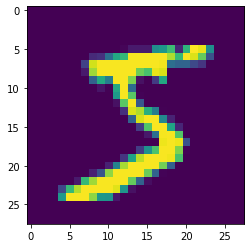

In [10]:
plt.imshow(x_train[0])

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
y_train.shape

(60000,)

In [17]:
y_example = to_categorical(y_train)
y_example.shape

(60000, 10)

In [18]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
# One-hot encoding for y_train and y_test
y_cat_test = to_categorical(y_test,num_classes=10)
y_cat_train = to_categorical(y_train,10)

In [25]:
y_cat_train.shape

(60000, 10)

In [27]:
# Normalization of images
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
# Changing the shape of x_train and x_test
# (batch_size,width,height,color_channel)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

## Model and Training

In [32]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [34]:
model = Sequential()

model.add(Convolution2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2,)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

# Output Layer --> Multi-class problem
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [37]:
model.fit(x_train,y_cat_train,epochs=10,
         validation_data=(x_test,y_cat_test),
         callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 48s 805us/sample - loss: 0.1340 - accuracy: 0.9600 - val_loss: 0.0502 - val_accuracy: 0.9826
Epoch 2/10
60000/60000 [==============================] - 39s 653us/sample - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.0416 - val_accuracy: 0.9852
Epoch 3/10
60000/60000 [==============================] - 35s 590us/sample - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0409 - val_accuracy: 0.9857
Epoch 4/10
60000/60000 [==============================] - 34s 562us/sample - loss: 0.0198 - accuracy: 0.9939 - val_loss: 0.0359 - val_accuracy: 0.9880
Epoch 5/10
60000/60000 [==============================] - 34s 565us/sample - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0347 - val_accuracy: 0.9895
Epoch 6/10
60000/60000 [==============================] - 35s 578us/sample - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.0393 - val_accuracy: 0.9884


## Model Evaluation

In [38]:
metrics = pd.DataFrame(model.history.history)

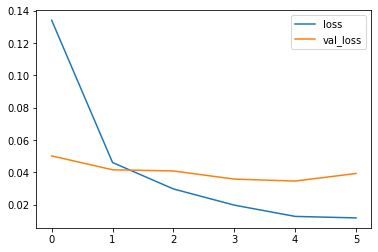

In [41]:
metrics[['loss','val_loss']].plot()

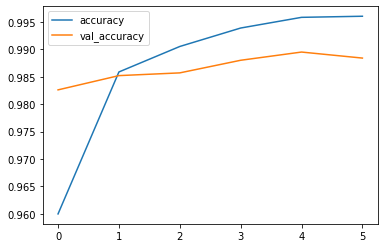

In [43]:
metrics[['accuracy','val_accuracy']].plot()

In [44]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.03932919872518905, 0.9884]

In [47]:
predictions = model.predict_classes(x_test)

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [50]:
confusion_matrix(y_test,predictions)

array([[ 976,    0,    0,    0,    0,    0,    1,    0,    2,    1],
       [   0, 1129,    0,    2,    0,    0,    2,    0,    1,    1],
       [   5,    2, 1008,    1,    3,    0,    2,    6,    4,    1],
       [   0,    0,    1, 1005,    0,    1,    0,    0,    3,    0],
       [   0,    0,    0,    0,  969,    0,    2,    0,    1,   10],
       [   2,    0,    0,    5,    0,  881,    1,    0,    2,    1],
       [   4,    1,    0,    0,    1,    2,  949,    0,    1,    0],
       [   1,    4,    6,    2,    2,    0,    0, 1002,    3,    8],
       [   3,    1,    0,    1,    0,    0,    0,    1,  965,    3],
       [   0,    0,    0,    1,    3,    0,    0,    1,    4, 1000]],
      dtype=int64)

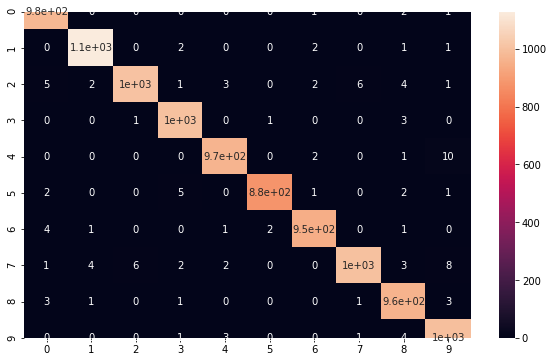

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [55]:
example = x_test[0]

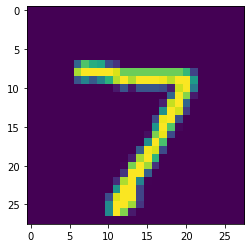

In [58]:
plt.imshow(example.reshape(28,28))

In [59]:
model.predict_classes(example.reshape(1,28,28,1))

array([7], dtype=int64)